# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Preprocesssing

### Reading Dataset

In [ ]:
dataset = pd.read_csv('car_dataset.csv')
dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### Drop Null Value

In [ ]:
dataset = dataset.drop(columns=['Unnamed: 0','New_Price','Name','Location'])
dataset = dataset.dropna()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5975 non-null   int64  
 1   Kilometers_Driven  5975 non-null   int64  
 2   Fuel_Type          5975 non-null   object 
 3   Transmission       5975 non-null   object 
 4   Owner_Type         5975 non-null   object 
 5   Mileage            5975 non-null   object 
 6   Engine             5975 non-null   object 
 7   Power              5975 non-null   object 
 8   Seats              5975 non-null   float64
 9   Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 513.5+ KB


### Converting Data Type to int or float

In [ ]:
dataset['Seats'] = dataset['Seats'].astype(int)

In [ ]:

dataset.loc[:,'Engine'] = dataset.loc[:,'Engine'].str.replace(' CC','')
dataset['Engine'] = pd.to_numeric(dataset['Engine'])

In [ ]:
dataset = dataset.rename(columns={'Power':'Power(bhp)'})
dataset.loc[:,'Power(bhp)'] = dataset.loc[:,'Power(bhp)'].str.replace(' bhp','')
dataset[dataset['Power(bhp)']=='null']
dataset = dataset.drop(dataset[dataset['Power(bhp)']=='null'].index)
dataset['Power(bhp)'] = pd.to_numeric(dataset['Power(bhp)'])

In [ ]:
print('Dataset Shape - ', dataset.shape, end='\n\n')
print(dataset.dtypes)

Dataset Shape -  (5872, 10)

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                 int64
Power(bhp)           float64
Seats                  int32
Price                float64
dtype: object


### Correcting Mileage value (km/kg to kmpl)

In [ ]:
dataset[['Mileage','Mileage_Unit']] = dataset.Mileage.str.split(expand=True)
dataset['Mileage'] = pd.to_numeric(dataset['Mileage'])
Correct_Mileage = []
for i in np.array(dataset[['Mileage','Mileage_Unit']]):
    if i[-1]=='km/kg':
        Correct_Mileage.append(i[0]*1.4)
    else:
        Correct_Mileage.append(i[0])

dataset['Mileage']=Correct_Mileage
dataset['Mileage']=Correct_Mileage

dataset = dataset.drop(columns=['Mileage_Unit'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   object 
 3   Transmission       5872 non-null   object 
 4   Owner_Type         5872 non-null   object 
 5   Mileage            5872 non-null   float64
 6   Engine             5872 non-null   int64  
 7   Power(bhp)         5872 non-null   float64
 8   Seats              5872 non-null   int32  
 9   Price              5872 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 481.7+ KB


### Encoding

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Fuel_Type','Transmission','Owner_Type'])
dataset = dataset.iloc[:,[0,1,2,3,4,5,7,9,10,11,12,13,14,15,16,6]]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5872 non-null   int64  
 1   Kilometers_Driven          5872 non-null   int64  
 2   Mileage                    5872 non-null   float64
 3   Engine                     5872 non-null   int64  
 4   Power(bhp)                 5872 non-null   float64
 5   Seats                      5872 non-null   int32  
 6   Fuel_Type_CNG              5872 non-null   bool   
 7   Fuel_Type_LPG              5872 non-null   bool   
 8   Fuel_Type_Petrol           5872 non-null   bool   
 9   Transmission_Automatic     5872 non-null   bool   
 10  Transmission_Manual        5872 non-null   bool   
 11  Owner_Type_First           5872 non-null   bool   
 12  Owner_Type_Fourth & Above  5872 non-null   bool   
 13  Owner_Type_Second          5872 non-null   bool   
 1

# Correlation Heatmap

<Axes: >

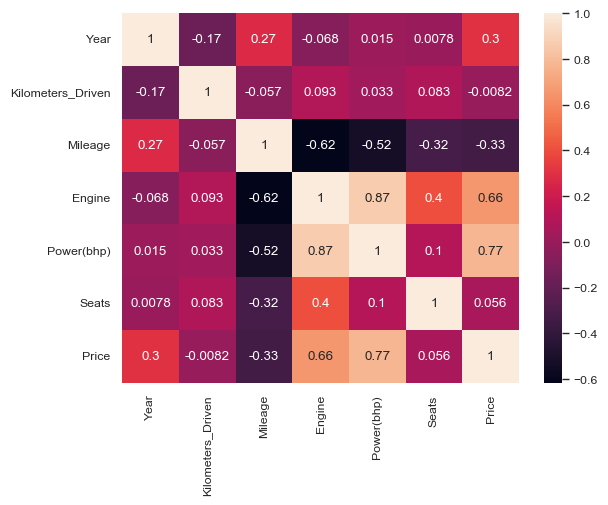

In [ ]:
import seaborn as sns
sns.set_theme(
    context='paper',style='white',font_scale=1,
	font='sans-serif'
	)

sns.heatmap(pd.DataFrame(
    dataset.iloc[:,[0,1,2,3,4,5,-1]]).corr(),
	annot=True
    )

# Model Training

### Simple Linear Regression

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5872 non-null   int64  
 1   Kilometers_Driven          5872 non-null   int64  
 2   Mileage                    5872 non-null   float64
 3   Engine                     5872 non-null   int64  
 4   Power(bhp)                 5872 non-null   float64
 5   Seats                      5872 non-null   int32  
 6   Fuel_Type_CNG              5872 non-null   bool   
 7   Fuel_Type_LPG              5872 non-null   bool   
 8   Fuel_Type_Petrol           5872 non-null   bool   
 9   Transmission_Automatic     5872 non-null   bool   
 10  Transmission_Manual        5872 non-null   bool   
 11  Owner_Type_First           5872 non-null   bool   
 12  Owner_Type_Fourth & Above  5872 non-null   bool   
 13  Owner_Type_Second          5872 non-null   bool   
 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
dataset.corrwith(dataset['Price'],axis=0)

Year                         0.299475
Kilometers_Driven           -0.008249
Mileage                     -0.331683
Engine                       0.658047
Power(bhp)                   0.772843
Seats                        0.055547
Fuel_Type_CNG               -0.052256
Fuel_Type_LPG               -0.026132
Fuel_Type_Petrol            -0.309363
Transmission_Automatic       0.585623
Transmission_Manual         -0.585623
Owner_Type_First             0.086041
Owner_Type_Fourth & Above   -0.018541
Owner_Type_Second           -0.070103
Owner_Type_Third            -0.050624
Price                        1.000000
dtype: float64

In [ ]:
x = dataset.loc[:,['Power(bhp)']].values
y = dataset.loc[:,'Price'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)
score_1 = r2_score(y_test,y_pred)
print(score_1)

0.6220993301525515


### Multi Linear Regression

In [ ]:
x1 = dataset.iloc[:,:-1].values
y1 = dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x1_train,y1_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
y1_pred = reg.predict(x1_test)
score_2 = r2_score(y1_test,y1_pred)
print(score_2)

0.720207499568501


### Decision Tree Regression

In [ ]:
x2 = dataset.iloc[:,:-1].values
y2 = dataset.iloc[:,-1].values

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x2_train,y2_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y2_pred = regressor.predict(x2_test)
score_3 = r2_score(y2_test,y2_pred)
print(score_3)

0.7921512745794156


### Random Forest Regression

In [ ]:
x3 = dataset.iloc[:,:-1].values
y3 = dataset.iloc[:,-1].values
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(n_estimators=50,
                                   random_state=10)

regressor2.fit(x3_train,y3_train)

RandomForestRegressor(n_estimators=50, random_state=10)

In [ ]:
from sklearn.metrics import r2_score
y3_pred = regressor2.predict(x3_test)
score_4 = r2_score(y3_test,y3_pred)
print(score_4)

0.9117559280460816


### SVR

In [ ]:
x4 = dataset.iloc[:,:-1].values
y4 = dataset.iloc[:,-1].values

In [ ]:
y4 = y4.reshape(len(y),1)

In [ ]:
#Feature scalLing
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x4 = sc_x.fit_transform(x4)
y4 = sc_y.fit_transform(y4)

In [ ]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.2, random_state = 0)

In [ ]:
#Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor3 = SVR(kernel = 'rbf')
regressor3.fit(x4_train, y4_train.ravel())

SVR()

In [ ]:
y4_pred = regressor3.predict(x4_test)
score_5 =r2_score(y4_test.ravel(), y4_pred)
print(score_5)

0.8652130543519285


### Polynomial Regression

In [ ]:
x5 = dataset.loc[:,['Power(bhp)']].values
y5 = dataset.loc[:,'Price'].values

In [ ]:
x5

array([[ 58.16],
       [126.2 ],
       [ 88.7 ],
       ...,
       [112.  ],
       [ 67.1 ],
       [ 57.6 ]])

In [ ]:
#Traning the Polynomial model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 8)
x5_poly = poly_reg.fit_transform(x5)

In [ ]:
#splitting
from sklearn.model_selection import train_test_split
x5_train, x5_test, y5_train, y5_test = train_test_split(x5_poly, y5, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(x5_train,y5_train)

LinearRegression()

In [ ]:
y5_pred = poly_reg.predict(x5_test)
score_6 = r2_score(y5_test, y5_pred)
print(score_6)

0.6643861180704949


# Model Performance

C:\Users\Work\AppData\Local\Temp\ipykernel_9460\3688993059.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(y=d[0],x=d.index,palette='rainbow',width=0.7)


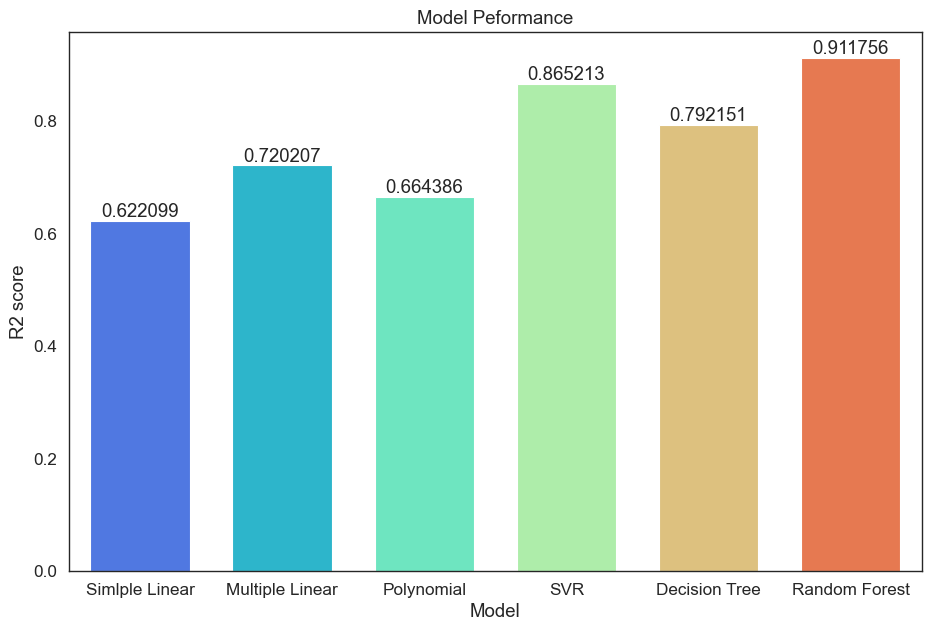

In [ ]:
model=['Simlple Linear','Multiple Linear','Polynomial','SVR','Decision Tree','Random Forest']
score=[score_1,score_2,score_6,score_5,score_3,score_4]
plt.figure(figsize=(11,7))
d = pd.DataFrame(index=model,data=score)
sns.set_theme(context='paper',style='white',font_scale=1.4,
             font='sans-serif'
             )
graph = sns.barplot(y=d[0],x=d.index,palette='rainbow',width=0.7)
for i in graph.containers:
    graph.bar_label(i,)

plt.title('Model Peformance')
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.show()
